# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


# Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



# Step 1: Reading & Understanding Data

In [1]:
# import necessary libs/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#suppress warnings
import warnings
warnings.filterwarnings('ignore')


## Step 1.1: Read the data

In [2]:
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_sharing.shape

(730, 16)

In [4]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#'instant' seems like index; let's drop it
bike_sharing.drop('instant', axis=1, inplace=True)

In [7]:
# casual and registered are represenation of cnt; let's drop these
bike_sharing.drop(['casual', 'registered'], axis=1, inplace=True)

## 1.2 Visualize the relationship between target variable viz. cnt with other features

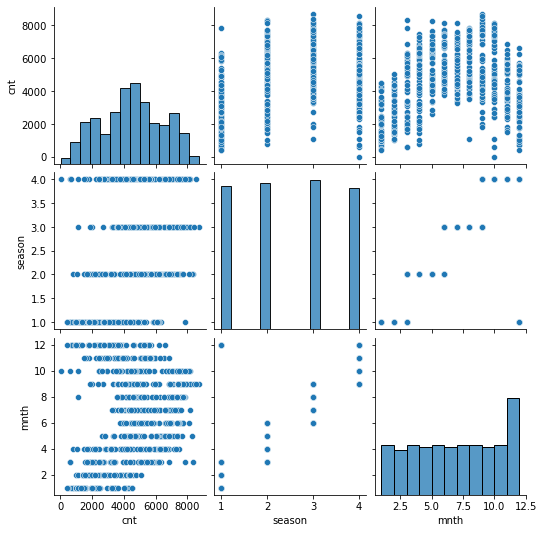

In [8]:
sns.pairplot(bike_sharing[['cnt', 'season', 'mnth']])

### Observation
* Season & month seems to have relationship

### Conclusion
* Let's keep months since business would like to have planning on monthly basis

In [9]:
bike_sharing.drop('season', axis=1, inplace=True)
bike_sharing.head()

,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
bike_sharing.head()

,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


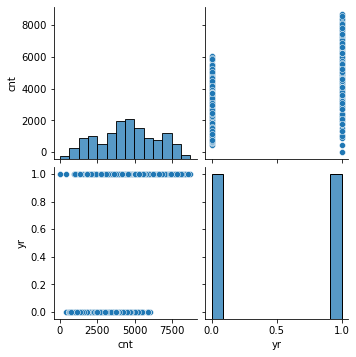

In [11]:
sns.pairplot(bike_sharing[['cnt', 'yr']])

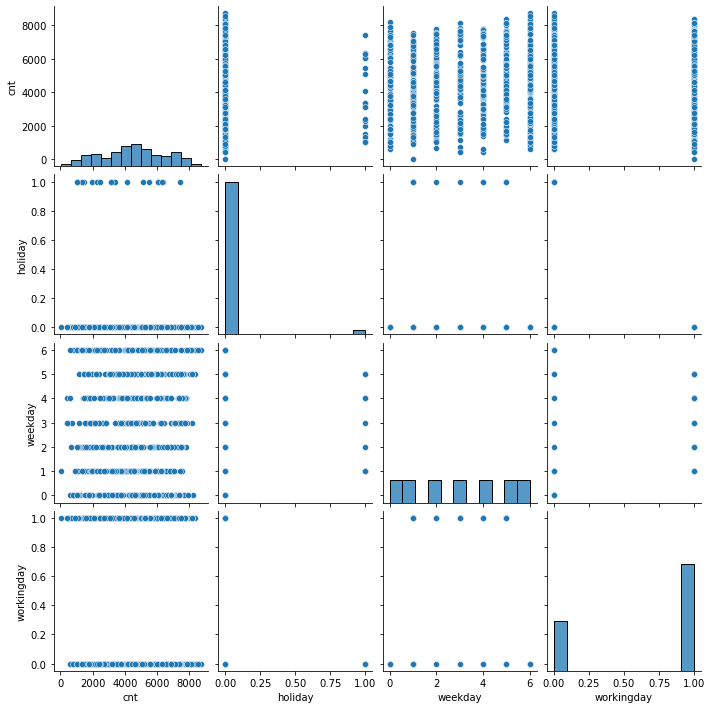

In [12]:
sns.pairplot(bike_sharing[['cnt', 'holiday', 'weekday', 'workingday']])

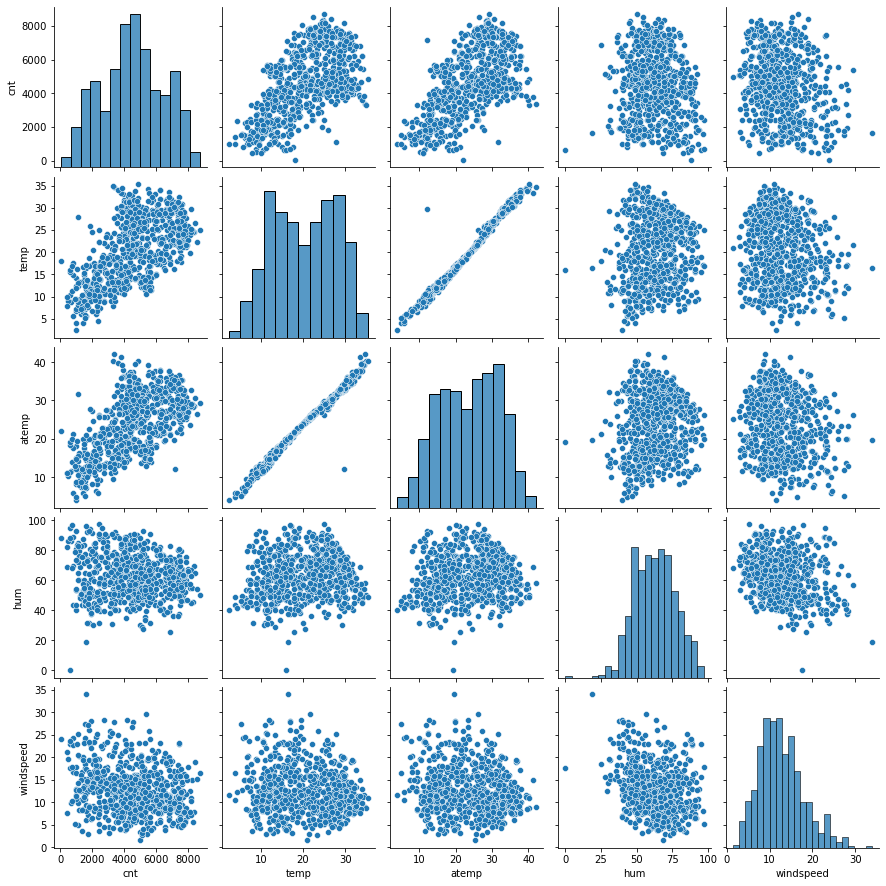

In [13]:
sns.pairplot(bike_sharing[['cnt', 'temp', 'atemp', 'hum', 'windspeed']])

In [14]:
# it seems there is no relationship between hum & windspeed with cnt; let's drop these
bike_sharing.drop(['hum', 'windspeed'], axis=1, inplace=True)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

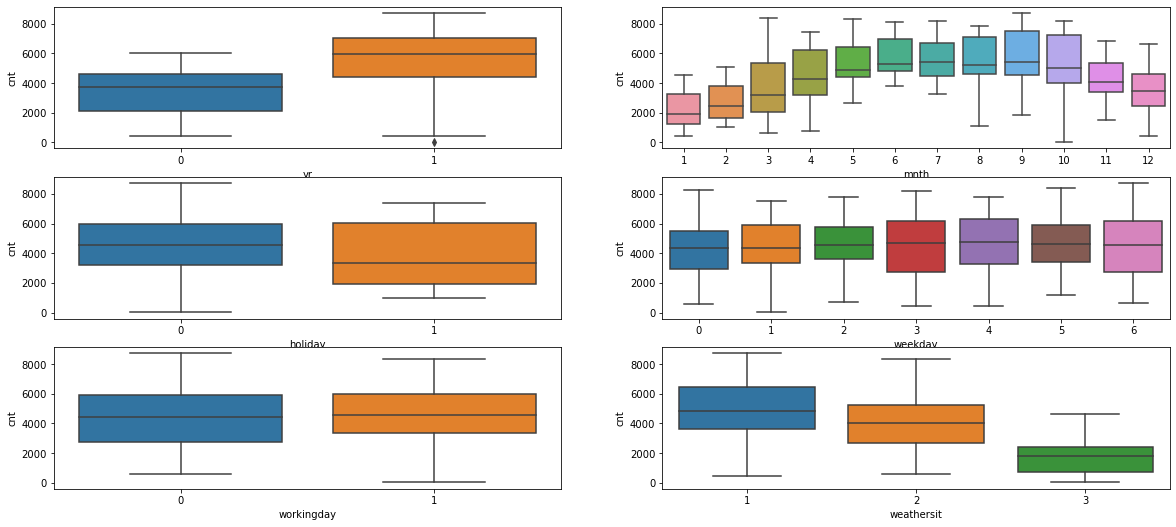

In [15]:
#let's use box-plot for understanding variation of cnt against Categorical variables 
# viz. season, yr, mnth, holiday, weekday, workingday, weathersit
plt.figure(figsize=(20, 12))

# create multiple sub-plots
plt.subplot(4, 2, 1)
sns.boxplot(x='yr', y='cnt', data=bike_sharing)

plt.subplot(4, 2, 2)
sns.boxplot(x='mnth', y='cnt', data=bike_sharing)

plt.subplot(4, 2, 3)
sns.boxplot(x='holiday', y='cnt', data=bike_sharing)

plt.subplot(4, 2, 4)
sns.boxplot(x='weekday', y='cnt', data=bike_sharing)

plt.subplot(4, 2, 5)
sns.boxplot(x='workingday', y='cnt', data=bike_sharing)

plt.subplot(4, 2, 6)
sns.boxplot(x='weathersit', y='cnt', data=bike_sharing)

In [16]:
# Assumption: Keep simple model so let's drop weekday feature and keep categorical variable workingday, holiday
bike_sharing.drop('weekday', axis=1, inplace=True)

In [17]:
bike_sharing.head()

,dteday,yr,mnth,holiday,workingday,weathersit,temp,atemp,cnt
0,01-01-2018,0,1,0,0,2,14.110847,18.18125,985
1,02-01-2018,0,1,0,0,2,14.902598,17.68695,801
2,03-01-2018,0,1,0,1,1,8.050924,9.47025,1349
3,04-01-2018,0,1,0,1,1,8.200000,10.60610,1562
4,05-01-2018,0,1,0,1,1,9.305237,11.46350,1600


In [18]:
#let's drop dteday object since it is already explained by yr & mnth
bike_sharing.drop('dteday', axis=1, inplace=True)

In [19]:
bike_sharing.head()

,yr,mnth,holiday,workingday,weathersit,temp,atemp,cnt
0,0,1,0,0,2,14.110847,18.18125,985
1,0,1,0,0,2,14.902598,17.68695,801
2,0,1,0,1,1,8.050924,9.47025,1349
3,0,1,0,1,1,8.200000,10.60610,1562
4,0,1,0,1,1,9.305237,11.46350,1600


# Step 2: Data Preparation

## Create Dummy Variables for Categorical variables:

### Handling of Categorical variable for mnth

In [20]:
# let's create dummy variable for mnth
month = pd.get_dummies(bike_sharing['mnth'], drop_first=True)
month.head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [21]:
#let's concat month to bike_sharing_01
bike_sharing = pd.concat([bike_sharing, month], axis=1)
bike_sharing.head()

,yr,mnth,holiday,workingday,weathersit,temp,atemp,cnt,2,3,4,5,6,7,8,9,10,11,12
0,0,1,0,0,2,14.110847,18.18125,985,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,2,14.902598,17.68695,801,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,8.050924,9.47025,1349,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,8.200000,10.60610,1562,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,1,9.305237,11.46350,1600,0,0,0,0,0,0,0,0,0,0,0


In [22]:
#give readable name to dummay variable 
bike_sharing.rename(columns={2: 'Feb', 3: 'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'July', 8:'Aug',
                               9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace = True)

In [23]:
#let's drop column 'mnth' from the dataframe
bike_sharing.drop('mnth', axis=1, inplace=True)

In [24]:
bike_sharing.head()

,yr,holiday,workingday,weathersit,temp,atemp,cnt,Feb,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec
0,0,0,0,2,14.110847,18.18125,985,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,14.902598,17.68695,801,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,1349,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,8.200000,10.60610,1562,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,9.305237,11.46350,1600,0,0,0,0,0,0,0,0,0,0,0


### Handling of Categorical variable 'weathersit'

In [25]:
# let's create dummy variable for weathersit
weathersit = pd.get_dummies(bike_sharing['weathersit'])
weathersit.head()

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


### Conclusion: since data does not have any rows with value 4, let's avoid dropping the first

In [26]:
#let's concat weathersit to bike_sharing
bike_sharing = pd.concat([bike_sharing, weathersit], axis=1)
bike_sharing.head()

,yr,holiday,workingday,weathersit,temp,atemp,cnt,Feb,Mar,Apr,...,Jun,July,Aug,Sep,Oct,Nov,Dec,1,2,3
0,0,0,0,2,14.110847,18.18125,985,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,2,14.902598,17.68695,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,1,8.200000,10.60610,1562,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,9.305237,11.46350,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
#give readable name to dummay variable related to weathersit
bike_sharing.rename(columns={1: 'Clear_weather', 2: 'Mist_Weather', 3:'Light_Snow_Weather'}, inplace = True)
bike_sharing.head()

,yr,holiday,workingday,weathersit,temp,atemp,cnt,Feb,Mar,Apr,...,Jun,July,Aug,Sep,Oct,Nov,Dec,Clear_weather,Mist_Weather,Light_Snow_Weather
0,0,0,0,2,14.110847,18.18125,985,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,2,14.902598,17.68695,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,1,8.200000,10.60610,1562,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,9.305237,11.46350,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
#let's drop column 'weathersit' from the dataframe
bike_sharing.drop('weathersit', axis=1, inplace=True)
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,cnt,Feb,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec,Clear_weather,Mist_Weather,Light_Snow_Weather
0,0,0,0,14.110847,18.18125,985,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,801,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,1349,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,1562,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,1600,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Step 3: Splitting the Data into training & testing sets

In [29]:
#let's create split in a way where rows are consistent everytime
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size=0.7, test_size=0.3, random_state=100)

## Let's apply scaling to numerical variables to make them in same range

In [30]:
scaler = MinMaxScaler()

In [31]:
num_vars = ['temp', 'atemp', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,cnt,Feb,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec,Clear_weather,Mist_Weather,Light_Snow_Weather
653,1,0,1,0.509887,0.501133,0.864243,0,0,0,0,0,0,0,0,1,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.827658,0,0,0,0,0,1,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.465255,0,1,0,0,0,0,0,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.204096,0,0,0,0,0,0,0,0,0,0,1,1,0,0
482,1,0,0,0.395666,0.391735,0.482973,0,0,1,0,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

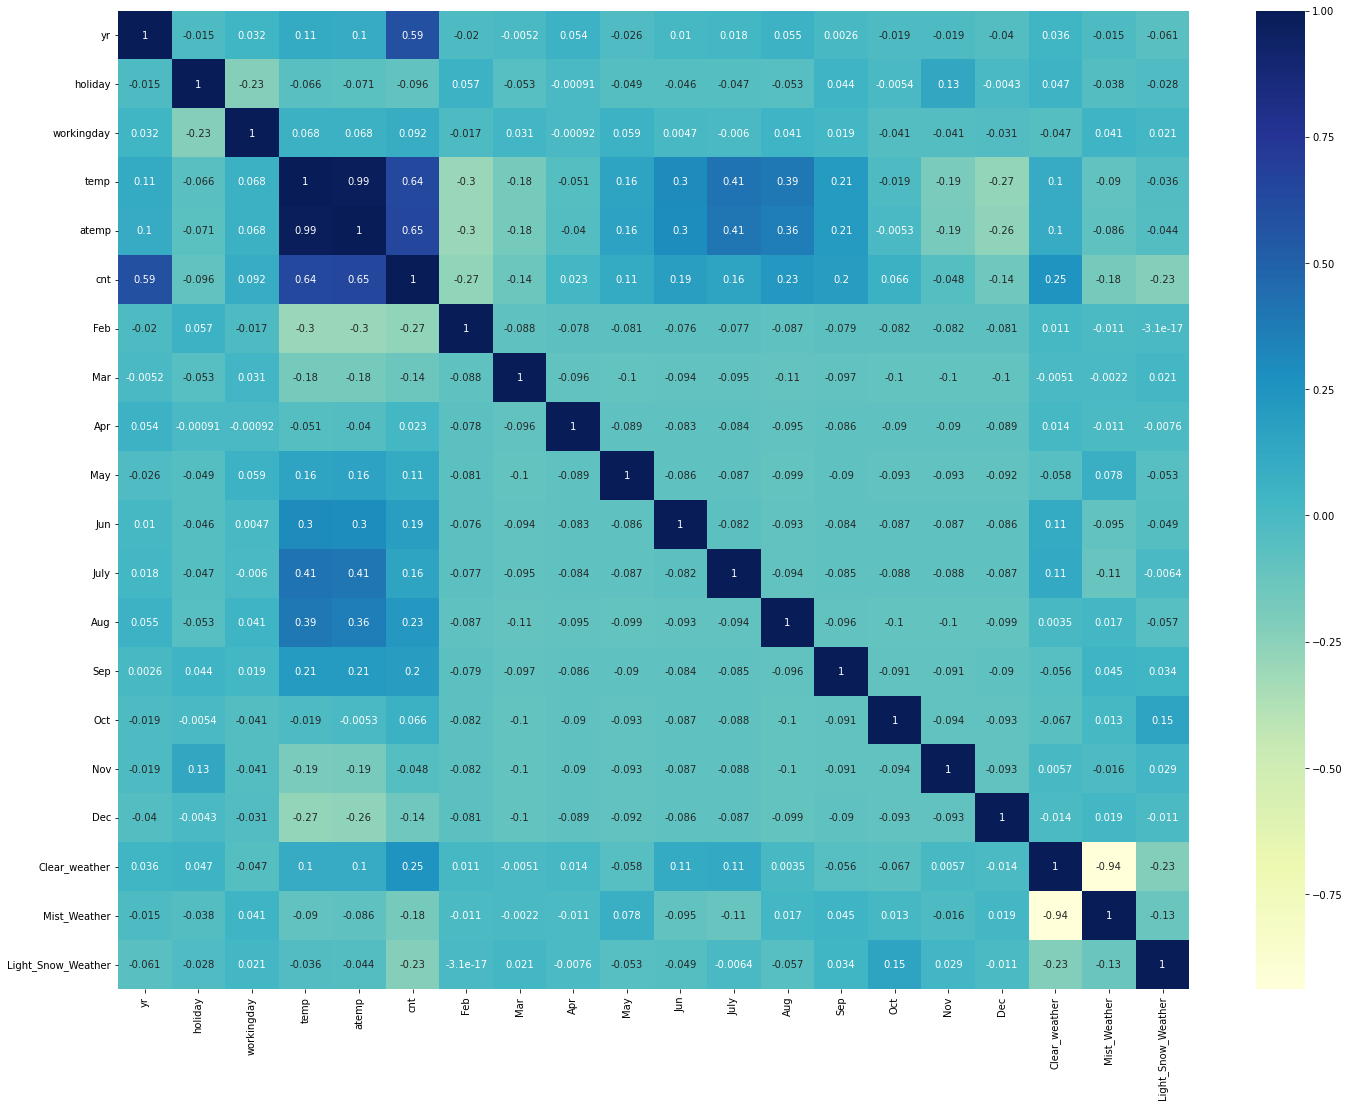

In [32]:
# let's check the correlation among features
plt.figure(figsize=(24, 18))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')

# Step 4: Model Building

In [33]:
y_train = df_train.pop('cnt')

In [34]:
X_train_01 = df_train

## Model 01: Build with all features

In [35]:
X_train_sm = sm.add_constant(X_train_01)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model_01 = lr.fit()

# check the summary
lr_model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     119.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.83e-166
Time:                        20:21:16   Log-Likelihood:                 467.30
No. Observations:                 510   AIC:                            -896.6
Df Residuals:                     491   BIC:                            -816.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0463      0.016     -2.957      0.003      -0.077      -0.016
yr                     0.2366      0.009     26.601      0.000       0.219       0.254
holiday               -0.0851      0.029     -2.925      0.004      -0.142      -0.028
workingday             0.0195      0.010      2.012      0.045       0.000       0.038
temp                   0.1592      0.153      1.039      0.299      -0.142       0.460
atemp                  0.2577      0.149      1.734      0.084      -0.034       0.550
Feb                    0.0209      0.023      0.919      0.358      -0.024       0.066
Mar                    0.0934      0.023      4.127      0.000       0.049       0.138
Apr                    0.1430      0.026      5.594      0.000       0.093       0.193
May                    0.1790      0.030      5.919      0.000       0.120       0.238
Jun                    0.1614      0.035      4.554      0.000       0.092       0.231
July                   0.1049      0.039      2.712      0.007       0.029       0.181
Aug                    0.1593      0.036      4.445      0.000       0.089       0.230
Sep                    0.2373      0.032      7.438      0.000       0.175       0.300
Oct                    0.2223      0.026      8.507      0.000       0.171       0.274
Nov                    0.1736      0.023      7.621      0.000       0.129       0.218
Dec                    0.1262      0.022      5.752      0.000       0.083       0.169
Clear_weather          0.1108      0.009     11.859      0.000       0.092       0.129
Mist_Weather           0.0322      0.010      3.331      0.001       0.013       0.051
Light_Snow_Weather    -0.1893      0.020     -9.295      0.000      -0.229      -0.149
==============================================================================
Omnibus:                       75.333   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.743
Skew:                          -0.717   Prob(JB):                     1.73e-46
Kurtosis:                       5.804   Cond. No.                     3.03e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
# let's check the collinearity using VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_01.columns
vif['VIF'] = [variance_inflation_factor(X_train_01.values, i) for i in range(X_train_01.shape[1])]
vif['VIF'] = round (vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,62.65
4,atemp,52.10
16,Clear_weather,12.70
17,Mist_Weather,6.98
11,Aug,5.85
10,July,5.54
9,Jun,4.54
12,Sep,3.94
8,May,3.70
13,Oct,2.82


## Observations
* temp has high vif & high p-value

## Conclusion 
* drop temp and rebuild the model 

## Model 02: Rebuild the model after dropping 'temp'

In [37]:
X_train_02 = X_train_01.drop('temp', axis=1)
X_train_02.head()

,yr,holiday,workingday,atemp,Feb,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec,Clear_weather,Mist_Weather,Light_Snow_Weather
653,1,0,1,0.501133,0,0,0,0,0,0,0,0,1,0,0,1,0,0
576,1,0,1,0.766351,0,0,0,0,0,1,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0,1,0,0,0,0,0,0,0,0,0,0,1,0
728,1,0,0,0.200348,0,0,0,0,0,0,0,0,0,0,1,1,0,0
482,1,0,0,0.391735,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [38]:
X_train_sm = sm.add_constant(X_train_02)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model_02 = lr.fit()

# check the summary
lr_model_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     126.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.73e-167
Time:                        20:21:17   Log-Likelihood:                 466.74
No. Observations:                 510   AIC:                            -897.5
Df Residuals:                     492   BIC:                            -821.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0433      0.015     -2.814      0.005      -0.074      -0.013
yr                     0.2373      0.009     26.753      0.000       0.220       0.255
holiday               -0.0828      0.029     -2.853      0.005      -0.140      -0.026
workingday             0.0197      0.010      2.035      0.042       0.001       0.039
atemp                  0.4039      0.048      8.490      0.000       0.310       0.497
Feb                    0.0224      0.023      0.987      0.324      -0.022       0.067
Mar                    0.0972      0.022      4.352      0.000       0.053       0.141
Apr                    0.1475      0.025      5.857      0.000       0.098       0.197
May                    0.1876      0.029      6.444      0.000       0.130       0.245
Jun                    0.1740      0.033      5.232      0.000       0.109       0.239
July                   0.1192      0.036      3.298      0.001       0.048       0.190
Aug                    0.1743      0.033      5.315      0.000       0.110       0.239
Sep                    0.2474      0.030      8.133      0.000       0.188       0.307
Oct                    0.2271      0.026      8.826      0.000       0.177       0.278
Nov                    0.1760      0.023      7.764      0.000       0.131       0.221
Dec                    0.1273      0.022      5.809      0.000       0.084       0.170
Clear_weather          0.1112      0.009     11.918      0.000       0.093       0.130
Mist_Weather           0.0323      0.010      3.349      0.001       0.013       0.051
Light_Snow_Weather    -0.1869      0.020     -9.236      0.000      -0.227      -0.147
==============================================================================
Omnibus:                       74.864   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.543
Skew:                          -0.700   Prob(JB):                     5.77e-48
Kurtosis:                       5.877   Cond. No.                     2.82e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.71e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
# let's check the collinearity using VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_02.columns
vif['VIF'] = [variance_inflation_factor(X_train_02.values, i) for i in range(X_train_02.shape[1])]
vif['VIF'] = round (vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
15,Clear_weather,12.34
16,Mist_Weather,6.81
3,atemp,5.34
10,Aug,4.90
9,July,4.83
8,Jun,4.00
11,Sep,3.58
7,May,3.43
12,Oct,2.73
6,Apr,2.40


## Observations
* Mist_Weather has high VIF score and it may have relationship with other features 


## Conclusion
* Let's drop Mist_Weather and rebuild the model

# Model 03: Let's drop the Mist_Weather feature

In [40]:
X_train_03 = X_train_02.drop('Mist_Weather', axis=1)

In [41]:
X_train_sm = sm.add_constant(X_train_03)
#create model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model_03 = lr.fit()

# check the summary
lr_model_03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     126.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.73e-167
Time:                        20:21:18   Log-Likelihood:                 466.74
No. Observations:                 510   AIC:                            -897.5
Df Residuals:                     492   BIC:                            -821.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0110      0.019     -0.566      0.572      -0.049       0.027
yr                     0.2373      0.009     26.753      0.000       0.220       0.255
holiday               -0.0828      0.029     -2.853      0.005      -0.140      -0.026
workingday             0.0197      0.010      2.035      0.042       0.001       0.039
atemp                  0.4039      0.048      8.490      0.000       0.310       0.497
Feb                    0.0224      0.023      0.987      0.324      -0.022       0.067
Mar                    0.0972      0.022      4.352      0.000       0.053       0.141
Apr                    0.1475      0.025      5.857      0.000       0.098       0.197
May                    0.1876      0.029      6.444      0.000       0.130       0.245
Jun                    0.1740      0.033      5.232      0.000       0.109       0.239
July                   0.1192      0.036      3.298      0.001       0.048       0.190
Aug                    0.1743      0.033      5.315      0.000       0.110       0.239
Sep                    0.2474      0.030      8.133      0.000       0.188       0.307
Oct                    0.2271      0.026      8.826      0.000       0.177       0.278
Nov                    0.1760      0.023      7.764      0.000       0.131       0.221
Dec                    0.1273      0.022      5.809      0.000       0.084       0.170
Clear_weather          0.0789      0.009      8.334      0.000       0.060       0.097
Light_Snow_Weather    -0.2193      0.027     -8.105      0.000      -0.272      -0.166
==============================================================================
Omnibus:                       74.864   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.543
Skew:                          -0.700   Prob(JB):                     5.77e-48
Kurtosis:                       5.877   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# let's check the collinearity using VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_03.columns
vif['VIF'] = [variance_inflation_factor(X_train_03.values, i) for i in range(X_train_03.shape[1])]
vif['VIF'] = round (vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,atemp,29.48
10,Aug,5.41
9,July,5.21
8,Jun,4.32
11,Sep,3.89
7,May,3.72
2,workingday,2.99
12,Oct,2.89
15,Clear_weather,2.76
6,Apr,2.51


## Assumption: Clear_weather may have relationship with temp

## Trial: Let's drop Clear_weather and rebuild the model


# Model 04: Let's drop Clear_weather and rebuild model

In [43]:
X_train_04 = X_train_03.drop('Clear_weather', axis=1)

In [44]:
X_train_sm = sm.add_constant(X_train_04)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model_04 = lr.fit()

# check the summary
lr_model_04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     114.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.32e-154
Time:                        20:21:19   Log-Likelihood:                 433.06
No. Observations:                 510   AIC:                            -832.1
Df Residuals:                     493   BIC:                            -760.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0300      0.020      1.491      0.137      -0.010       0.069
yr                     0.2383      0.009     25.176      0.000       0.220       0.257
holiday               -0.0729      0.031     -2.357      0.019      -0.134      -0.012
workingday             0.0169      0.010      1.642      0.101      -0.003       0.037
atemp                  0.4220      0.051      8.320      0.000       0.322       0.522
Feb                    0.0297      0.024      1.226      0.221      -0.018       0.077
Mar                    0.1014      0.024      4.255      0.000       0.055       0.148
Apr                    0.1513      0.027      5.631      0.000       0.099       0.204
May                    0.1791      0.031      5.771      0.000       0.118       0.240
Jun                    0.1855      0.035      5.231      0.000       0.116       0.255
July                   0.1308      0.039      3.394      0.001       0.055       0.207
Aug                    0.1712      0.035      4.891      0.000       0.102       0.240
Sep                    0.2401      0.032      7.401      0.000       0.176       0.304
Oct                    0.2247      0.027      8.184      0.000       0.171       0.279
Nov                    0.1808      0.024      7.477      0.000       0.133       0.228
Dec                    0.1303      0.023      5.571      0.000       0.084       0.176
Light_Snow_Weather    -0.2680      0.028     -9.507      0.000      -0.323      -0.213
==============================================================================
Omnibus:                       78.321   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.763
Skew:                          -0.832   Prob(JB):                     1.37e-37
Kurtosis:                       5.285   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# let's check the collinearity using VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_04.columns
vif['VIF'] = [variance_inflation_factor(X_train_04.values, i) for i in range(X_train_04.shape[1])]
vif['VIF'] = round (vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,atemp,28.52
10,Aug,5.41
9,July,5.21
8,Jun,4.31
11,Sep,3.89
7,May,3.72
2,workingday,2.99
12,Oct,2.89
6,Apr,2.50
5,Mar,2.30


### Assumption
* atemp may relationship to month of the year

### Trial
* Let's drop atemp and rebuild the model



# Model 05: Rebuild the model after dropping atemp

In [46]:
X_train_05 = X_train_04.drop('atemp', axis=1)

In [47]:
X_train_sm = sm.add_constant(X_train_05)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model_05 = lr.fit()

# check the summary
lr_model_05.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     102.8
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          4.58e-141
Time:                        20:21:20   Log-Likelihood:                 399.56
No. Observations:                 510   AIC:                            -767.1
Df Residuals:                     494   BIC:                            -699.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1080      0.019      5.698      0.000       0.071       0.145
yr                     0.2485      0.010     24.817      0.000       0.229       0.268
holiday               -0.0589      0.033     -1.787      0.075      -0.124       0.006
workingday             0.0217      0.011      1.972      0.049    7.56e-05       0.043
Feb                    0.0594      0.026      2.326      0.020       0.009       0.110
Mar                    0.1833      0.023      7.917      0.000       0.138       0.229
Apr                    0.2680      0.024     10.961      0.000       0.220       0.316
May                    0.3570      0.024     14.862      0.000       0.310       0.404
Jun                    0.4085      0.025     16.480      0.000       0.360       0.457
July                   0.3876      0.025     15.736      0.000       0.339       0.436
Aug                    0.3990      0.023     17.150      0.000       0.353       0.445
Sep                    0.4323      0.024     17.786      0.000       0.385       0.480
Oct                    0.3548      0.024     14.741      0.000       0.307       0.402
Nov                    0.2566      0.024     10.737      0.000       0.210       0.304
Dec                    0.1839      0.024      7.669      0.000       0.137       0.231
Light_Snow_Weather    -0.2797      0.030     -9.312      0.000      -0.339      -0.221
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.893
Skew:                          -0.890   Prob(JB):                     2.23e-57
Kurtosis:                       6.019   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# let's check the collinearity using VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_05.columns
vif['VIF'] = [variance_inflation_factor(X_train_05.values, i) for i in range(X_train_05.shape[1])]
vif['VIF'] = round (vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,workingday,2.81
0,yr,1.93
9,Aug,1.30
4,Mar,1.27
6,May,1.24
10,Sep,1.24
12,Nov,1.24
5,Apr,1.23
11,Oct,1.23
8,July,1.20


## Observations
* holiday/workingday may have relationship

## Conclusion
* Let's rebuild model with/without holiday/workingday

# Model 06: Let's rebuild the model after dropping temp_to_atemp feature

In [49]:
X_train_06 = X_train_05.drop('holiday', axis=1)

In [50]:
X_train_sm = sm.add_constant(X_train_06)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model_06 = lr.fit()

# check the summary
lr_model_06.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     109.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.08e-141
Time:                        20:21:21   Log-Likelihood:                 397.91
No. Observations:                 510   AIC:                            -765.8
Df Residuals:                     495   BIC:                            -702.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1025      0.019      5.468      0.000       0.066       0.139
yr                     0.2486      0.010     24.771      0.000       0.229       0.268
workingday             0.0261      0.011      2.434      0.015       0.005       0.047
Feb                    0.0585      0.026      2.286      0.023       0.008       0.109
Mar                    0.1855      0.023      8.006      0.000       0.140       0.231
Apr                    0.2690      0.025     10.978      0.000       0.221       0.317
May                    0.3590      0.024     14.933      0.000       0.312       0.406
Jun                    0.4109      0.025     16.566      0.000       0.362       0.460
July                   0.3900      0.025     15.826      0.000       0.342       0.438
Aug                    0.4012      0.023     17.231      0.000       0.355       0.447
Sep                    0.4317      0.024     17.723      0.000       0.384       0.480
Oct                    0.3560      0.024     14.765      0.000       0.309       0.403
Nov                    0.2539      0.024     10.622      0.000       0.207       0.301
Dec                    0.1852      0.024      7.709      0.000       0.138       0.232
Light_Snow_Weather    -0.2780      0.030     -9.239      0.000      -0.337      -0.219
==============================================================================
Omnibus:                       93.447   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.366
Skew:                          -0.891   Prob(JB):                     1.30e-56
Kurtosis:                       5.989   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# let's check the collinearity using VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_06.columns
vif['VIF'] = [variance_inflation_factor(X_train_06.values, i) for i in range(X_train_06.shape[1])]
vif['VIF'] = round (vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,workingday,2.72
0,yr,1.93
8,Aug,1.29
3,Mar,1.27
5,May,1.24
4,Apr,1.22
9,Sep,1.22
10,Oct,1.22
6,Jun,1.19
7,July,1.19


## Observations
*  p-value and VIF are in recommended range

## Conclusion
* Let's baseline this model for our case study

# Step 5: Residual Analysis of the training data

In [52]:
#make prediction
y_train_pred = lr_model_06.predict(X_train_sm)

In [53]:
#let's compute residual
res = y_train - y_train_pred

<AxesSubplot:ylabel='Density'>

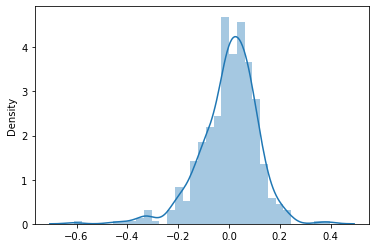

In [54]:
sns.distplot(res)

# Step 6: Prediction and evluation on the test set

In [55]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,cnt,Feb,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec,Clear_weather,Mist_Weather,Light_Snow_Weather
184,0,1,0,0.831783,0.769660,0.692706,0,0,0,0,0,1,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.712034,0,0,0,0,1,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.303382,0,0,0,0,0,0,0,0,1,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.547400,0,0,0,0,0,0,1,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.569029,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [56]:
y_test = df_test.pop('cnt')

In [57]:
X_test = df_test

In [58]:
X_test_sm = sm.add_constant(X_test)

In [59]:
X_test_sm = X_test_sm.drop(['temp', 'Mist_Weather', 'Clear_weather', 'atemp', 'holiday'], axis=1)

In [60]:
y_test_pred = lr_model_06.predict(X_test_sm)

In [61]:
r2_score(y_test, y_test_pred)

0.7412492554289157

# Step 7: Model Evaluation

Text(0, 0.5, 'y_test_pred')

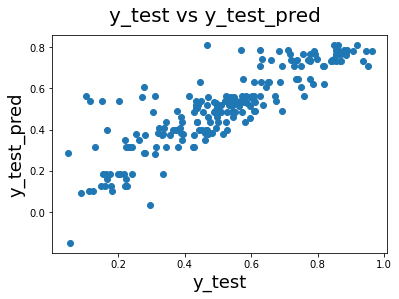

In [62]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=18)